In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

<b>Implement 2-layer neural network</b> <br>

In [35]:

class DeepNetwork:
    def __init__(self, input_size, hidden_size, output_size):

        self.weights_1 = np.random.randn(input_size, hidden_size) * 0.01 
        self.bias_1 = np.zeros((1, hidden_size))
        self.weights_2 = np.random.randn(hidden_size, output_size) * 0.01
        self.bias_2 = np.zeros((1, output_size))

    def sigmoid(self, x):
         return 1 / (1 + np.exp(-x))

    def d_sigmoid(self, x):
        s = self.sigmoid(x)
        z = s*(1-s)
        return z

    def layer_output(self, X):
           #first layer output
        z1 = np.dot(X, self.weights_1) + self.bias_1
        out1 = self.sigmoid(z1)
        return out1

    def dot_product(self, weights, inputs): 
           
        return np.dot(inputs, weights)

    def update_weights(self, X, y, learning_rate): 
    # Forward pass
        z1 = np.dot(X, self.weights_1) + self.bias_1 
        o1 = self.sigmoid(z1)
    
        z2 = np.dot(o1, self.weights_2) + self.bias_2  
        o2 = self.sigmoid(z2)

    # Error
        error = o2 - y

    # Backpropagation
        dz2 = error * self.d_sigmoid(z2)
        delta_w2 = np.dot(o1.T, dz2)
        delta_b2 = np.sum(dz2, axis=0)

        dz1 = np.dot(dz2, self.weights_2.T) * self.d_sigmoid(z1)
        delta_w1 = np.dot(X.T, dz1)
        delta_b1 = np.sum(dz1, axis=0, keepdims=True)

        # Gradient descent update
        self.weights_1 -= learning_rate * delta_w1
        self.bias_1 -= learning_rate * delta_b1
        self.weights_2 -= learning_rate * delta_w2
        self.bias_2 -= learning_rate * delta_b2


    def predict(self, X):
        o1 = self.layer_output(X)
        z2 = self.dot_product(self.weights_2, o1) + self.bias_2
        a2 = self.sigmoid(z2)
        return a2 > 0.5

<b>Testing 2-layer network</b> <br>

In [28]:
#import XOR data
X = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
y = np.array([[0], [1], [1], [0]])

#use one data for test
X_train = np.array([[0, 0, 1], [0, 1, 1]])
y_train = np.array([[0], [1]])
X_test = np.array([[1, 1, 1],[1,0,1]])
y_test = np.array([[0],[1]])


In [29]:
input_size = 3
hidden_size = 5
output_size =1
model = DeepNetwork(input_size, hidden_size, output_size)
for epoch in range(1000):

    model.update_weights(X_train, y_train, learning_rate=0.5)
    prediction = model.predict(X_test)
    print("Test Prediction:", prediction.astype(int))
    print("True Label:", y_test)



Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
Tru

 <b>Using data Augmentation for testing</b> <br>

In [30]:


# Function to generate XNOR dataset
def generate_xnor_data(n_samples, noise):
    # Generate binary inputs 
    X = np.random.randint(0, 2, size=(n_samples, 2))
    
    # XNOR operation
    y = np.logical_not(np.logical_xor(X[:, 0], X[:, 1])).astype(int)
    
    # Add noise to the input
    noise_matrix = np.random.normal(0, noise, size=X.shape)
    X_noisy = X + noise_matrix

    return X_noisy, y

#X_noisy, y = generate_xnor_data(n_samples=1000, noise=0.2)

# Visualize the noisy dataset 
#plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c=y, cmap='coolwarm', edgecolor='k')
#plt.xlabel('Input 1')
#plt.ylabel('Input 2')
#plt.title('Noisy XNOR Dataset')
#plt.show()


In [31]:
X_noisy, y = generate_xnor_data(3000, 0.5)

# Add a bias term (just like in XOR example)
X_noisy = np.hstack([X_noisy, np.ones((X_noisy.shape[0], 1))])  # Add bias term as third column

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=42)

In [32]:
input_size = X_train.shape[1]
hidden_size = 5
output_size = 1

#define model
model = DeepNetwork(input_size, hidden_size, output_size)

Epoch 0: Accuracy = 46.33%, Error = 0.5367


Epoch 100: Accuracy = 46.33%, Error = 0.5367
Epoch 200: Accuracy = 45.17%, Error = 0.5483
Epoch 300: Accuracy = 55.50%, Error = 0.4450
Epoch 400: Accuracy = 73.00%, Error = 0.2700
Epoch 500: Accuracy = 72.33%, Error = 0.2767
Epoch 600: Accuracy = 72.50%, Error = 0.2750
Epoch 700: Accuracy = 73.50%, Error = 0.2650
Epoch 800: Accuracy = 73.17%, Error = 0.2683
Epoch 900: Accuracy = 73.17%, Error = 0.2683
Epoch 1000: Accuracy = 73.17%, Error = 0.2683
Epoch 1100: Accuracy = 73.33%, Error = 0.2667
Epoch 1200: Accuracy = 73.33%, Error = 0.2667
Epoch 1300: Accuracy = 73.33%, Error = 0.2667
Epoch 1400: Accuracy = 73.50%, Error = 0.2650
Epoch 1500: Accuracy = 73.67%, Error = 0.2633
Epoch 1600: Accuracy = 73.67%, Error = 0.2633
Epoch 1700: Accuracy = 73.83%, Error = 0.2617
Epoch 1800: Accuracy = 73.50%, Error = 0.2650
Epoch 1900: Accuracy = 73.33%, Error = 0.2667
Epoch 2000: Accuracy = 73.33%, Error = 0.2667
Epoch 2100: Accuracy = 73.67%, Error = 0.2633
Epoch 2200: Accuracy = 73.67%, Error = 0.26

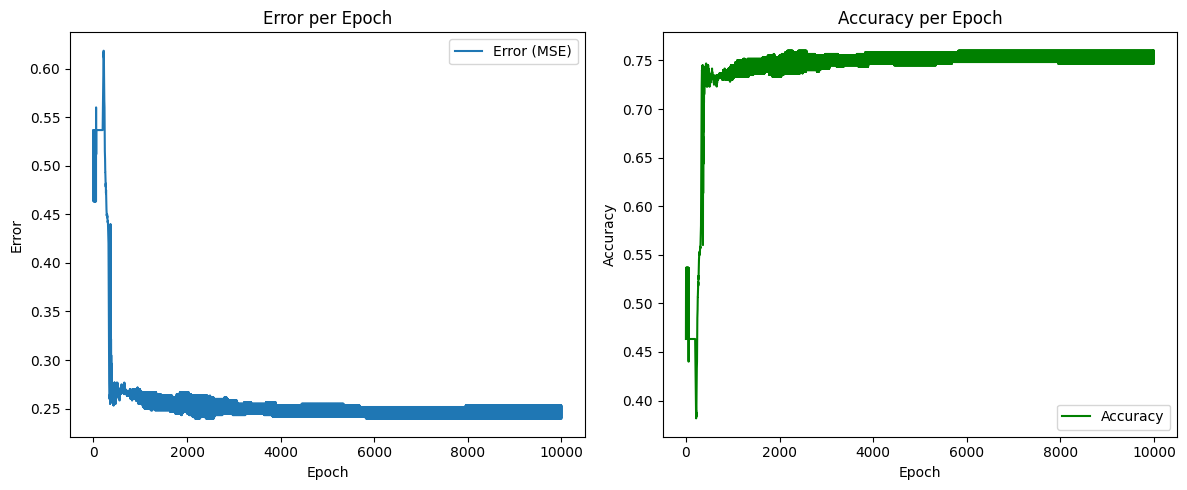

In [33]:
errors = []
accuracies = []

#training loop 
for epoch in range(10000):
    model.update_weights(X_train, y_train.reshape(-1, 1), learning_rate=0.01)

    # Test prediction
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions.astype(int))
    accuracies.append(accuracy)

    # Calculate mean squared error (MSE)
    error = np.mean((predictions - y_test.reshape(-1, 1)) ** 2)
    errors.append(error)

    # Print progress every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Accuracy = {accuracy * 100:.2f}%, Error = {error:.4f}')

# Plotting the Error per Epoch
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(errors, label='Error (MSE)')
plt.title('Error per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()

# Plotting the Accuracy per Epoch
plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Accuracy', color='green')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
